[*********************100%%**********************]  1 of 1 completed


/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting param

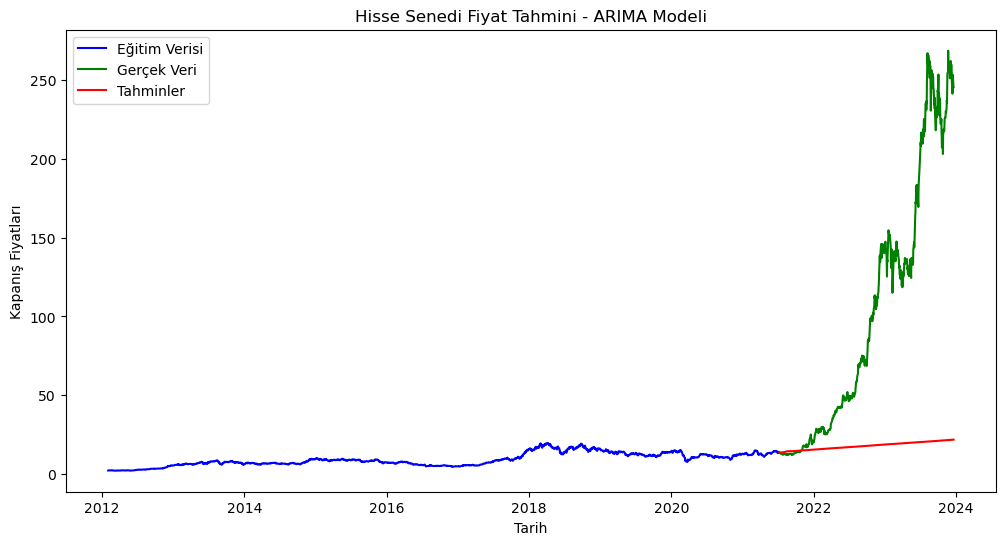

Mean Squared Error (MSE): 13560.703774221322


In [4]:
import yfinance as yf
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Veri çekme
stock = "THYAO.IS"
start_date = datetime(2012, 2, 2)
end_date = datetime(2023, 12, 20)
bist30_data = yf.download(stock, start=start_date, end=end_date)
df = bist30_data['Close']

# Veriyi eğitim ve test setlerine bölme
train_size = int(len(df) * 0.80)
train, test = df[0:train_size], df[train_size:]

# ARIMA modelini eğitme
order = (50, 2, 2)
model = ARIMA(train, order=order)
model_fit = model.fit()

# Gelecekteki fiyatları tahmin etme
future_steps = len(test)
predictions = model_fit.forecast(steps=future_steps)

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Eğitim Verisi', color='blue')
plt.plot(test.index, test, label='Gerçek Veri', color='green')
plt.plot(test.index, predictions, label='Tahminler', color='red')
plt.title('Hisse Senedi Fiyat Tahmini - ARIMA Modeli')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatları')
plt.legend()
plt.show()

# Hata hesaplama
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
